# Emsemble method

# Import Required Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Load and Preprocess the Dataset

In [8]:
# Load the dataset
user_details_data = pd.read_csv("/Users/akhilaannireddy/Projects/Machine_learning_project/Dataset/cleaned_user_data.csv")

# Create binary target variable
expertise_labels = ['Beginner', 'Intermediate', 'Advanced', 'Expert']
user_details_data['expertise_level'] = pd.qcut(user_details_data['reputation'], q=4, labels=expertise_labels)
user_details_data['expertise_binary'] = user_details_data['expertise_level'].apply(lambda x: 'Low' if x in ['Beginner', 'Intermediate'] else 'High')

# Drop unnecessary columns
drop_cols = [
    'user_id', 'display_name', 'profile_image', 'link', 'account_id',
    'last_modified_date', 'last_access_date', 'creation_date',
    'is_employee', 'account_age_years', 'reputation', 'expertise_level'
]
user_details_data.drop(columns=drop_cols, inplace=True)

# Fill missing values and encode
user_details_data = user_details_data.fillna(0)
for col in user_details_data.select_dtypes(include='object').columns:
    user_details_data[col] = LabelEncoder().fit_transform(user_details_data[col].astype(str))

# Encode the target
label_encoder = LabelEncoder()
user_details_data['expertise_binary_encoded'] = label_encoder.fit_transform(user_details_data['expertise_binary'])
user_details_data.drop(columns=['expertise_binary'], inplace=True)

# Train-test split
X = user_details_data.drop(columns=['expertise_binary_encoded'])
y = user_details_data['expertise_binary_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Random Forest

Random Forest Accuracy: 0.7501

Random Forest Classification Report:

              precision    recall  f1-score   support

         Low       0.77      0.71      0.74     10479
        High       0.73      0.79      0.76     10481

    accuracy                           0.75     20960
   macro avg       0.75      0.75      0.75     20960
weighted avg       0.75      0.75      0.75     20960



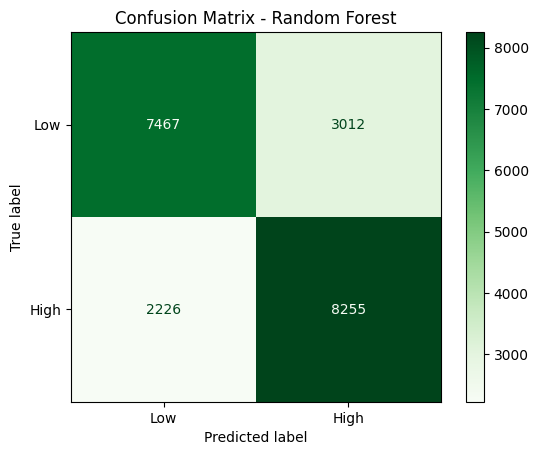

In [9]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Evaluation
print(f"Random Forest Accuracy: {acc_rf:.4f}\n")
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf, target_names=["Low", "High"]))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=["Low", "High"], cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.show()


# AdaBoost Classifier

AdaBoost Accuracy: 0.7481

AdaBoost Classification Report:

              precision    recall  f1-score   support

         Low       0.78      0.69      0.73     10479
        High       0.72      0.81      0.76     10481

    accuracy                           0.75     20960
   macro avg       0.75      0.75      0.75     20960
weighted avg       0.75      0.75      0.75     20960



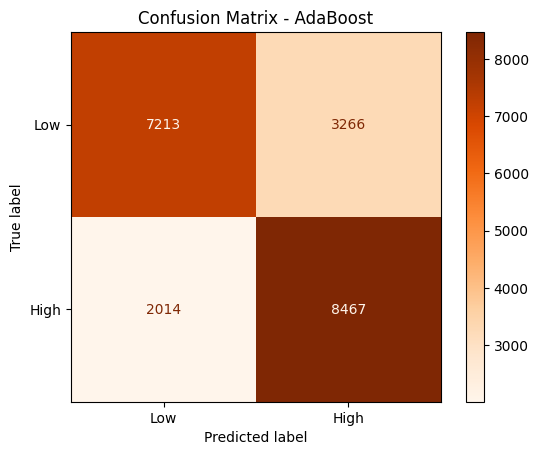

In [11]:
# Define base estimator (weak learner)
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

# Train AdaBoost model (updated syntax for newer sklearn versions)
ada_model = AdaBoostClassifier(
    estimator=base_estimator,       # <-- updated from base_estimator to estimator
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)

# Fit the model
ada_model.fit(X_train_scaled, y_train)

# Predict
y_pred_ada = ada_model.predict(X_test_scaled)
acc_ada = accuracy_score(y_test, y_pred_ada)

# Evaluation
print(f"AdaBoost Accuracy: {acc_ada:.4f}\n")
print("AdaBoost Classification Report:\n")
print(classification_report(y_test, y_pred_ada, target_names=["Low", "High"]))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ada, display_labels=["Low", "High"], cmap="Oranges")
plt.title("Confusion Matrix - AdaBoost")
plt.show()

# Compare Accuracies of Ensemble Methods

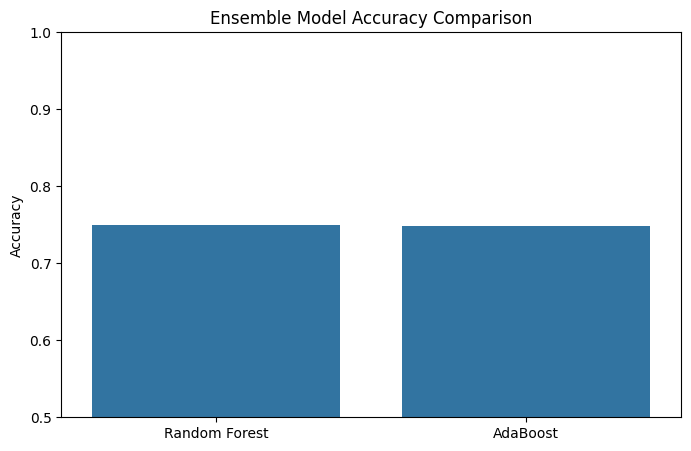

In [12]:
# Compare accuracies
ensemble_names = ['Random Forest', 'AdaBoost']
ensemble_accuracies = [acc_rf, acc_ada]

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=ensemble_names, y=ensemble_accuracies)
plt.title("Ensemble Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1.0)
plt.show()